In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("ClubData.csv")

In [3]:
pd.set_option('display.max_columns', None)
df.head(20)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,https://cdn.sofifa.org/teams/2/light/5.png,€93M,€340K,2142,Right,4.0,4.0,4.0,High/ Medium,Normal,Yes,LF,10.0,"Jul 1, 2012",NaN,2020,5'8,163lbs,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,82+3,82+3,82+3,8

In [4]:
df.shape

(18207, 89)

In [5]:
df = df.drop(columns =["Unnamed: 0","ID","Photo","Flag","Club Logo","Name","Joined","Contract Valid Until"])

In [6]:
df.shape

(18207, 81)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 81 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       18207 non-null  int64  
 1   Nationality               18207 non-null  object 
 2   Overall                   18207 non-null  int64  
 3   Potential                 18207 non-null  int64  
 4   Club                      17966 non-null  object 
 5   Value                     18207 non-null  object 
 6   Wage                      18207 non-null  object 
 7   Special                   18207 non-null  int64  
 8   Preferred Foot            18159 non-null  object 
 9   International Reputation  18159 non-null  float64
 10  Weak Foot                 18159 non-null  float64
 11  Skill Moves               18159 non-null  float64
 12  Work Rate                 18159 non-null  object 
 13  Body Type                 18159 non-null  object 
 14  Real F

### Data Cleaning

#### Missing Values

In [8]:
df.isnull().sum().sort_values(ascending = False)

Loaned From    16943
RWB             2085
LCM             2085
CF              2085
LF              2085
               ...  
Nationality        0
Wage               0
Potential          0
Overall            0
Age                0
Length: 81, dtype: int64

In [9]:
df["Loaned From"].value_counts()

Atalanta            20
Sassuolo            18
Juventus            17
SL Benfica          17
Sporting CP         14
                    ..
Ettifaq FC           1
Shanghai SIPG FC     1
Amiens SC            1
FC Tokyo             1
Real Sociedad        1
Name: Loaned From, Length: 341, dtype: int64

In [10]:
df["Loaned From"].nunique()

341

In [11]:
df["Loaned From"].mode()

0    Atalanta
dtype: object

In [12]:
df["Loaned From"].mode()[0]

'Atalanta'

In [13]:
df["Loaned From"] = df["Loaned From"].fillna(df["Loaned From"].mode()[0])

In [14]:
df.isnull().sum().sort_values(ascending = False)

RWB            2085
RF             2085
LF             2085
LW             2085
RS             2085
               ... 
Nationality       0
Wage              0
Potential         0
Overall           0
Age               0
Length: 81, dtype: int64

#### Imputing Categorical Values

In [15]:
df["RDM"] = df["RDM"].fillna(df["RDM"].mode()[0])
df["LW"] = df["LW"].fillna(df["LW"].mode()[0])
df["ST"] = df["ST"].fillna(df["ST"].mode()[0])
df["LS"] = df["LS"].fillna(df["LS"].mode()[0])
df["LF"] = df["LF"].fillna(df["LF"].mode()[0])
df["LCM"] = df["LCM"].fillna(df["LCM"].mode()[0])
df["RM"] = df["RM"].fillna(df["RM"].mode()[0])
df["RF"] = df["RF"].fillna(df["RF"].mode()[0])
df["RW"] = df["RW"].fillna(df["RW"].mode()[0])
df["LAM"] = df["LAM"].fillna(df["LAM"].mode()[0])
df["CAM"] = df["CAM"].fillna(df["CAM"].mode()[0])
df["RS"] = df["RS"].fillna(df["RS"].mode()[0])
df["RB"] = df["RB"].fillna(df["RB"].mode()[0])
df["RCB"] = df["RCB"].fillna(df["RCB"].mode()[0])
df["CB"] = df["CB"].fillna(df["CB"].mode()[0])
df["LM"] = df["LM"].fillna(df["LM"].mode()[0])
df["RAM"] = df["RAM"].fillna(df["RAM"].mode()[0])
df["CM"] = df["CM"].fillna(df["CM"].mode()[0])
df["RCM"] = df["RCM"].fillna(df["RCM"].mode()[0])
df["CF"] = df["CF"].fillna(df["CF"].mode()[0])
df["CDM"] = df["CDM"].fillna(df["CDM"].mode()[0])
df["LCB"] = df["LCB"].fillna(df["LCB"].mode()[0])
df["LWB"] = df["LWB"].fillna(df["LWB"].mode()[0])
df["LDM"] = df["LDM"].fillna(df["LDM"].mode()[0])
df["RWB"] = df["RWB"].fillna(df["RWB"].mode()[0])
df["LB"] = df["LB"].fillna(df["LB"].mode()[0])
df["Release Clause"] = df["Release Clause"].fillna(df["Release Clause"].mode()[0])
df["Club"] = df["Club"].fillna(df["Club"].mode()[0])
df["Position"] = df["Position"].fillna(df["Position"].mode()[0])
df["Weight"] = df["Weight"].fillna(df["Weight"].mode()[0])
df["Real Face"] = df["Real Face"].fillna(df["Real Face"].mode()[0])
df["Work Rate"] = df["Work Rate"].fillna(df["Work Rate"].mode()[0])
df["Body Type"] = df["Body Type"].fillna(df["Body Type"].mode()[0])
df["Height"] = df["Height"].fillna(df["Height"].mode()[0])
df["Preferred Foot"] = df["Preferred Foot"].fillna(df["Preferred Foot"].mode()[0])

#### Imputing Numerical Values

In [16]:
df["Jersey Number"] = df["Jersey Number"].fillna(df["Jersey Number"].mean())
df["Positioning"] = df["Positioning"].fillna(df["Positioning"].mean())
df["SprintSpeed"] = df["SprintSpeed"].fillna(df["SprintSpeed"].mean())
df["LongShots"] = df["LongShots"].fillna(df["LongShots"].mean())
df["Strength"] = df["Strength"].fillna(df["Strength"].mean())
df["Crossing"] = df["Crossing"].fillna(df["Crossing"].mean())
df["ShotPower"] = df["ShotPower"].fillna(df["ShotPower"].mean())
df["Finishing"] = df["Finishing"].fillna(df["Finishing"].mean())
df["Interceptions"] = df["Interceptions"].fillna(df["Interceptions"].mean())
df["Aggression"] = df["Aggression"].fillna(df["Aggression"].mean())
df["Penalties"] = df["Penalties"].fillna(df["Penalties"].mean())
df["Stamina"] = df["Stamina"].fillna(df["Stamina"].mean())
df["Vision"] = df["Vision"].fillna(df["Vision"].mean())
df["HeadingAccuracy"] = df["HeadingAccuracy"].fillna(df["HeadingAccuracy"].mean())
df["Marking"] = df["Marking"].fillna(df["Marking"].mean())
df["Agility"] = df["Agility"].fillna(df["Agility"].mean())
df["Reactions"] = df["Reactions"].fillna(df["Reactions"].mean())
df["Balance"] = df["Balance"].fillna(df["Balance"].mean())
df["Skill Moves"] = df["Skill Moves"].fillna(df["Skill Moves"].mean())
df["Curve"] = df["Curve"].fillna(df["Curve"].mean())
df["Dribbling"] = df["Dribbling"].fillna(df["Dribbling"].mean())
df["Volleys"] = df["Volleys"].fillna(df["Volleys"].mean())
df["International Reputation"] = df["International Reputation"].fillna(df["International Reputation"].mean())
df["BallControl"] = df["BallControl"].fillna(df["BallControl"].mean())
df["LongPassing"] = df["LongPassing"].fillna(df["LongPassing"].mean())
df["Jumping"] = df["Jumping"].fillna(df["Jumping"].mean())
df["Acceleration"] = df["Acceleration"].fillna(df["Acceleration"].mean())
df["SlidingTackle"] = df["SlidingTackle"].fillna(df["SlidingTackle"].mean())
df["FKAccuracy"] = df["FKAccuracy"].fillna(df["FKAccuracy"].mean())
df["Composure"] = df["Composure"].fillna(df["Composure"].mean())
df["Weak Foot"] = df["Weak Foot"].fillna(df["Weak Foot"].mean())
df["GKReflexes"] = df["GKReflexes"].fillna(df["GKReflexes"].mean())
df["GKPositioning"] = df["GKPositioning"].fillna(df["GKPositioning"].mean())
df["GKKicking"] = df["GKKicking"].fillna(df["GKKicking"].mean())
df["GKHandling"] = df["GKHandling"].fillna(df["GKHandling"].mean())
df["GKDiving"] = df["GKDiving"].fillna(df["GKDiving"].mean())
df["StandingTackle"] = df["StandingTackle"].fillna(df["StandingTackle"].mean())
df["ShortPassing"] = df["ShortPassing"].fillna(df["ShortPassing"].mean())

In [17]:
df.head()

,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Loaned From,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,Atalanta,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,33,Portugal,94,94,Juventus,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,Atalanta,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,Atalanta,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,27,Spain,91,93,Manchester United,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,Atalanta,6'4,168lbs,61+2,61+2,61+2,63+2,61+2,61+2,61+2,63+2,61+2,61+2,61+2,61+2,58+2,58+2,58+2,61+2,61+2,62+2,62+2,62+2,61+2,61+2,63+2,63+2,63+2,61+2,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,27,Belgium,91,92,Manchester City,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,Atalanta,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [18]:
df.isnull().sum().sort_values(ascending = False)

Age               0
LB                0
Reactions         0
Agility           0
SprintSpeed       0
                 ..
RF                0
CF                0
LF                0
LW                0
Release Clause    0
Length: 81, dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 81 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       18207 non-null  int64  
 1   Nationality               18207 non-null  object 
 2   Overall                   18207 non-null  int64  
 3   Potential                 18207 non-null  int64  
 4   Club                      18207 non-null  object 
 5   Value                     18207 non-null  object 
 6   Wage                      18207 non-null  object 
 7   Special                   18207 non-null  int64  
 8   Preferred Foot            18207 non-null  object 
 9   International Reputation  18207 non-null  float64
 10  Weak Foot                 18207 non-null  float64
 11  Skill Moves               18207 non-null  float64
 12  Work Rate                 18207 non-null  object 
 13  Body Type                 18207 non-null  object 
 14  Real F

#### Extracting Data from Object Dtypes

##### Extracting Thousands and Saving it in the column : Value

In [20]:
def extract_money(x):
    val = x.replace('€', '')
    if 'M' in val:
        val = float(val.replace('M', ''))*10**5
    elif 'K' in x:
        val = float(val.replace('K', ''))*1000
    return float(val)

In [21]:
df["Value"] = df["Value"].apply(lambda x: extract_money(x))
df["Wage"] = df["Wage"].apply(lambda x: extract_money(x))
df["Release Clause"] = df["Release Clause"].apply(lambda x: extract_money(x))

In [22]:
df.head()

,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Loaned From,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,31,Argentina,94,94,FC Barcelona,11050000.0,565000.0,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,Atalanta,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,22650000.0
1,33,Portugal,94,94,Juventus,7700000.0,405000.0,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,Atalanta,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,12710000.0
2,26,Brazil,92,93,Paris Saint-Germain,11850000.0,290000.0,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,Atalanta,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,22810000.0
3,27,Spain,91,93,Manchester United,7200000.0,260000.0,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,Atalanta,6'4,168lbs,61+2,61+2,61+2,63+2,61+2,61+2,61+2,63+2,61+2,61+2,61+2,61+2,58+2,58+2,58+2,61+2,61+2,62+2,62+2,62+2,61+2,61+2,63+2,63+2,63+2,61+2,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,13860000.0
4,27,Belgium,91,92,Manchester City,10200000.0,355000.0,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,Atalanta,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,19640000.0


###### Extracting Weights

In [23]:
def extract_weight(x):
    val = x.replace('lbs', '')
    return float(val)

In [24]:
df["Weight"] = df["Weight"].apply(lambda x : extract_weight(x))

In [25]:
df.head()

,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Loaned From,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,31,Argentina,94,94,FC Barcelona,11050000.0,565000.0,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,Atalanta,5'7,159.0,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,22650000.0
1,33,Portugal,94,94,Juventus,7700000.0,405000.0,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,Atalanta,6'2,183.0,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,12710000.0
2,26,Brazil,92,93,Paris Saint-Germain,11850000.0,290000.0,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,Atalanta,5'9,150.0,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,22810000.0
3,27,Spain,91,93,Manchester United,7200000.0,260000.0,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,Atalanta,6'4,168.0,61+2,61+2,61+2,63+2,61+2,61+2,61+2,63+2,61+2,61+2,61+2,61+2,58+2,58+2,58+2,61+2,61+2,62+2,62+2,62+2,61+2,61+2,63+2,63+2,63+2,61+2,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,13860000.0
4,27,Belgium,91,92,Manchester City,10200000.0,355000.0,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,Atalanta,5'11,154.0,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,19640000.0


###### Extracting Work Rate

In [26]:
def extract_string(x):
    val = x.split("/")
    wr = str(val[0])
    return wr

In [27]:
df["Work Rate"] = df["Work Rate"].apply(lambda x : extract_string(x))

In [28]:
df.head()

,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Loaned From,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,31,Argentina,94,94,FC Barcelona,11050000.0,565000.0,2202,Left,5.0,4.0,4.0,Medium,Messi,Yes,RF,10.0,Atalanta,5'7,159.0,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,22650000.0
1,33,Portugal,94,94,Juventus,7700000.0,405000.0,2228,Right,5.0,4.0,5.0,High,C. Ronaldo,Yes,ST,7.0,Atalanta,6'2,183.0,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,12710000.0
2,26,Brazil,92,93,Paris Saint-Germain,11850000.0,290000.0,2143,Right,5.0,5.0,5.0,High,Neymar,Yes,LW,10.0,Atalanta,5'9,150.0,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,22810000.0
3,27,Spain,91,93,Manchester United,7200000.0,260000.0,1471,Right,4.0,3.0,1.0,Medium,Lean,Yes,GK,1.0,Atalanta,6'4,168.0,61+2,61+2,61+2,63+2,61+2,61+2,61+2,63+2,61+2,61+2,61+2,61+2,58+2,58+2,58+2,61+2,61+2,62+2,62+2,62+2,61+2,61+2,63+2,63+2,63+2,61+2,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,13860000.0
4,27,Belgium,91,92,Manchester City,10200000.0,355000.0,2281,Right,4.0,5.0,4.0,High,Normal,Yes,RCM,7.0,Atalanta,5'11,154.0,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,19640000.0


###### Converting height -ft (object) into cm (int)

In [29]:
eg = df["Height"][1]
eg

"6'2"

In [30]:
x = eg.split("'")
val1 = x[0]
val2 = x[1]
print(val1,val2)

6 2


In [31]:
x = eg.split("'")
val1 = x[0]
val2 = x[1]
ft = int(val1+val2)*0.1
cm = ft * 30.48
cm

188.976

In [32]:
def extract_height(x):
    val = x.split("'")
    val1 = val[0]
    val2 = val[1]
    ft = int(val1+val2)*0.1
    cm = ft*30.48
    return cm

In [33]:
df["Height"] = df["Height"].apply(lambda x : extract_height(x))

In [34]:
df["Height"].head()

0     173.736
1     188.976
2     179.832
3     195.072
4    1557.528
Name: Height, dtype: float64

###### Extracting info from LS	ST	RS	LW	LF	etc

In [35]:
eg = df["LS"][1]
eg

'91+3'

In [36]:
x = eg.split("+")
val1 = x[0]
val2 = x[1]
print(val1,val2)

91 3


In [37]:
def extract_value(x):
    val = x.split("+")
    val1 = int(val[0])
    val2 = int(val[1])
    res = val1+val2
    return res

In [38]:
df["LS"] = df["LS"].apply(lambda x : extract_value(x))
df["ST"] = df["ST"].apply(lambda x : extract_value(x))
df["RS"] = df["RS"].apply(lambda x : extract_value(x))
df["LW"] = df["LW"].apply(lambda x : extract_value(x))
df["LF"] = df["LF"].apply(lambda x : extract_value(x))
df["CF"] = df["CF"].apply(lambda x : extract_value(x))
df["RF"] = df["RF"].apply(lambda x : extract_value(x))
df["RW"] = df["RW"].apply(lambda x : extract_value(x))
df["LAM"] = df["LAM"].apply(lambda x : extract_value(x))
df["CAM"] = df["CAM"].apply(lambda x : extract_value(x))
df["RAM"] = df["RAM"].apply(lambda x : extract_value(x))
df["LM"] = df["LM"].apply(lambda x : extract_value(x))
df["LCM"] = df["LCM"].apply(lambda x : extract_value(x))
df["CM"] = df["CM"].apply(lambda x : extract_value(x))
df["RCM"] = df["RCM"].apply(lambda x : extract_value(x))
df["RM"] = df["RM"].apply(lambda x : extract_value(x))
df["LWB"] = df["LWB"].apply(lambda x : extract_value(x))
df["LDM"] = df["LDM"].apply(lambda x : extract_value(x))
df["CDM"] = df["CDM"].apply(lambda x : extract_value(x))
df["RDM"] = df["RDM"].apply(lambda x : extract_value(x))
df["RWB"] = df["RWB"].apply(lambda x : extract_value(x))
df["LB"] = df["LB"].apply(lambda x : extract_value(x))
df["LCB"] = df["LCB"].apply(lambda x : extract_value(x))
df["CB"] = df["CB"].apply(lambda x : extract_value(x))
df["RCB"] = df["RCB"].apply(lambda x : extract_value(x))
df["RB"] = df["RB"].apply(lambda x : extract_value(x))

In [39]:
df.head()

,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Loaned From,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,31,Argentina,94,94,FC Barcelona,11050000.0,565000.0,2202,Left,5.0,4.0,4.0,Medium,Messi,Yes,RF,10.0,Atalanta,173.736,159.0,90,90,90,94,95,95,95,94,95,95,95,93,86,86,86,93,66,63,63,63,66,61,49,49,49,61,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,22650000.0
1,33,Portugal,94,94,Juventus,7700000.0,405000.0,2228,Right,5.0,4.0,5.0,High,C. Ronaldo,Yes,ST,7.0,Atalanta,188.976,183.0,94,94,94,92,93,93,93,92,91,91,91,91,84,84,84,91,68,64,64,64,68,64,56,56,56,64,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,12710000.0
2,26,Brazil,92,93,Paris Saint-Germain,11850000.0,290000.0,2143,Right,5.0,5.0,5.0,High,Neymar,Yes,LW,10.0,Atalanta,179.832,150.0,87,87,87,92,92,92,92,92,92,92,92,91,84,84,84,91,68,63,63,63,68,63,50,50,50,63,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,22810000.0
3,27,Spain,91,93,Manchester United,7200000.0,260000.0,1471,Right,4.0,3.0,1.0,Medium,Lean,Yes,GK,1.0,Atalanta,195.072,168.0,63,63,63,65,63,63,63,65,63,63,63,63,60,60,60,63,63,64,64,64,63,63,65,65,65,63,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,13860000.0
4,27,Belgium,91,92,Manchester City,10200000.0,355000.0,2281,Right,4.0,5.0,4.0,High,Normal,Yes,RCM,7.0,Atalanta,1557.528,154.0,85,85,85,90,90,90,90,90,91,91,91,91,90,90,90,91,80,80,80,80,80,76,69,69,69,76,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,19640000.0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 81 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       18207 non-null  int64  
 1   Nationality               18207 non-null  object 
 2   Overall                   18207 non-null  int64  
 3   Potential                 18207 non-null  int64  
 4   Club                      18207 non-null  object 
 5   Value                     18207 non-null  float64
 6   Wage                      18207 non-null  float64
 7   Special                   18207 non-null  int64  
 8   Preferred Foot            18207 non-null  object 
 9   International Reputation  18207 non-null  float64
 10  Weak Foot                 18207 non-null  float64
 11  Skill Moves               18207 non-null  float64
 12  Work Rate                 18207 non-null  object 
 13  Body Type                 18207 non-null  object 
 14  Real F

#### Label Encoding

In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [42]:
df.select_dtypes(include=["object"])

,Nationality,Club,Preferred Foot,Work Rate,Body Type,Real Face,Position,Loaned From
0,Argentina,FC Barcelona,Left,Medium,Messi,Yes,RF,Atalanta
1,Portugal,Juventus,Right,High,C. Ronaldo,Yes,ST,Atalanta
2,Brazil,Paris Saint-Germain,Right,High,Neymar,Yes,LW,Atalanta
3,Spain,Manchester United,Right,Medium,Lean,Yes,GK,Atalanta
4,Belgium,Manchester City,Right,High,Normal,Yes,RCM,Atalanta
...,...,...,...,...,...,...,...,...
18202,England,Crewe Alexandra,Right,Medium,Lean,No,CM,Atalanta
18203,Sweden,Trelleborgs FF,Right,Medium,Normal,No,ST,Atalanta
18204,England,Cambridge United,Right,Medium,Normal,No,ST,Atalanta
18205,England,Tranmere Rovers,Right,Medium,Lean,No,RW,Atalanta


In [43]:
df["Nationality"]=le.fit_transform(df["Nationality"])
df["Club"]=le.fit_transform(df["Club"])
df["Preferred Foot"]=le.fit_transform(df["Preferred Foot"])
df["Work Rate"]=le.fit_transform(df["Work Rate"])
df["Body Type"]=le.fit_transform(df["Body Type"])
df["Real Face"]=le.fit_transform(df["Real Face"])
df["Position"]=le.fit_transform(df["Position"])
df["Loaned From"]=le.fit_transform(df["Loaned From"])

In [44]:
df.head()

,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Loaned From,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,31,6,94,94,211,11050000.0,565000.0,2202,0,5.0,4.0,4.0,2,4,1,21,10.0,26,173.736,159.0,90,90,90,94,95,95,95,94,95,95,95,93,86,86,86,93,66,63,63,63,66,61,49,49,49,61,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,22650000.0
1,33,123,94,94,325,7700000.0,405000.0,2228,1,5.0,4.0,5.0,0,1,1,26,7.0,26,188.976,183.0,94,94,94,92,93,93,93,92,91,91,91,91,84,84,84,91,68,64,64,64,68,64,56,56,56,64,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,12710000.0
2,26,20,92,93,434,11850000.0,290000.0,2143,1,5.0,5.0,5.0,0,5,1,14,10.0,26,179.832,150.0,87,87,87,92,92,92,92,92,92,92,92,91,84,84,84,91,68,63,63,63,68,63,50,50,50,63,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,22810000.0
3,27,139,91,93,374,7200000.0,260000.0,1471,1,4.0,3.0,1.0,2,3,1,5,1.0,26,195.072,168.0,63,63,63,65,63,63,63,65,63,63,63,63,60,60,60,63,63,64,64,64,63,63,65,65,65,63,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,13860000.0
4,27,13,91,92,373,10200000.0,355000.0,2281,1,4.0,5.0,4.0,0,6,1,19,7.0,26,1557.528,154.0,85,85,85,90,90,90,90,90,91,91,91,91,90,90,90,91,80,80,80,80,80,76,69,69,69,76,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,19640000.0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 81 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       18207 non-null  int64  
 1   Nationality               18207 non-null  int32  
 2   Overall                   18207 non-null  int64  
 3   Potential                 18207 non-null  int64  
 4   Club                      18207 non-null  int32  
 5   Value                     18207 non-null  float64
 6   Wage                      18207 non-null  float64
 7   Special                   18207 non-null  int64  
 8   Preferred Foot            18207 non-null  int32  
 9   International Reputation  18207 non-null  float64
 10  Weak Foot                 18207 non-null  float64
 11  Skill Moves               18207 non-null  float64
 12  Work Rate                 18207 non-null  int32  
 13  Body Type                 18207 non-null  int32  
 14  Real F

### KMeans Clustering

In [46]:
from sklearn.cluster import KMeans

In [47]:
kmeans_data = df

In [48]:
k=[1,2,3,4,5,6,7,8,9,10]
ssd=[]
for i in k:
    model=KMeans(n_clusters=i)
    model.fit(kmeans_data)
    ssd.append(model.inertia_ )

Text(0, 0.5, 'Inertia(Sum of Squared Distances)')

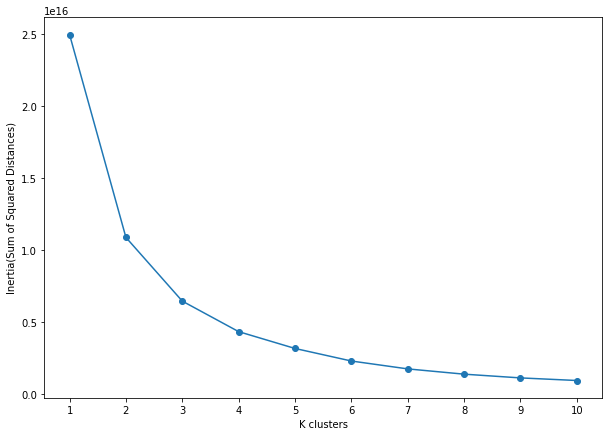

In [49]:
plt.figure(figsize = (10,7))
plt.plot(k,ssd,marker='o')
plt.xticks(k)
plt.xlabel("K clusters")
plt.ylabel("Inertia(Sum of Squared Distances)")

In [50]:
model=KMeans(n_clusters=4)
model.fit(kmeans_data)

KMeans(n_clusters=4)

In [51]:
model.labels_

array([3, 3, 3, ..., 0, 0, 0])

In [52]:
model.cluster_centers_

array([[2.50494648e+01, 7.59486606e+01, 6.50196529e+01, 7.02957006e+01,
        3.18753825e+02, 3.77760174e+05, 5.75412711e+03, 1.56833343e+03,
        7.69668017e-01, 1.05106335e+00, 2.91778862e+00, 2.29312105e+00,
        1.45020258e+00, 5.13448630e+00, 5.58142347e-02, 1.13064643e+01,
        1.99914595e+01, 3.74736651e+01, 5.35035971e+02, 1.65777408e+02,
        5.91523251e+01, 5.91523251e+01, 5.91523251e+01, 6.04254097e+01,
        5.98664208e+01, 5.98664208e+01, 5.98664208e+01, 6.04254097e+01,
        6.00871984e+01, 6.00871984e+01, 6.00871984e+01, 6.08094576e+01,
        5.90698434e+01, 5.90698434e+01, 5.90698434e+01, 6.08094576e+01,
        5.90550281e+01, 5.85270001e+01, 5.85270001e+01, 5.85270001e+01,
        5.90550281e+01, 5.84957368e+01, 5.77751708e+01, 5.77751708e+01,
        5.77751708e+01, 5.84957368e+01, 4.84311085e+01, 4.41908716e+01,
        5.13750566e+01, 5.73035594e+01, 4.15376207e+01, 5.39106735e+01,
        4.56975388e+01, 4.16284351e+01, 5.13859934e+01, 5.691387

In [53]:
model.n_iter_

8

In [54]:
kmeans_data["Groups"]=model.labels_

In [55]:
kmeans_data.head()

,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Loaned From,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Groups
0,31,6,94,94,211,11050000.0,565000.0,2202,0,5.0,4.0,4.0,2,4,1,21,10.0,26,173.736,159.0,90,90,90,94,95,95,95,94,95,95,95,93,86,86,86,93,66,63,63,63,66,61,49,49,49,61,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,22650000.0,3
1,33,123,94,94,325,7700000.0,405000.0,2228,1,5.0,4.0,5.0,0,1,1,26,7.0,26,188.976,183.0,94,94,94,92,93,93,93,92,91,91,91,91,84,84,84,91,68,64,64,64,68,64,56,56,56,64,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,12710000.0,3
2,26,20,92,93,434,11850000.0,290000.0,2143,1,5.0,5.0,5.0,0,5,1,14,10.0,26,179.832,150.0,87,87,87,92,92,92,92,92,92,92,92,91,84,84,84,91,68,63,63,63,68,63,50,50,50,63,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,22810000.0,3
3,27,139,91,93,374,7200000.0,260000.0,1471,1,4.0,3.0,1.0,2,3,1,5,1.0,26,195.072,168.0,63,63,63,65,63,63,63,65,63,63,63,63,60,60,60,63,63,64,64,64,63,63,65,65,65,63,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,13860000.0,3
4,27,13,91,92,373,10200000.0,355000.0,2281,1,4.0,5.0,4.0,0,6,1,19,7.0,26,1557.528,154.0,85,85,85,90,90,90,90,90,91,91,91,91,90,90,90,91,80,80,80,80,80,76,69,69,69,76,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,19640000.0,3


### Hierarichical Agglomerative Clustering

In [56]:
agg_data = df

In [57]:
from sklearn.cluster import AgglomerativeClustering

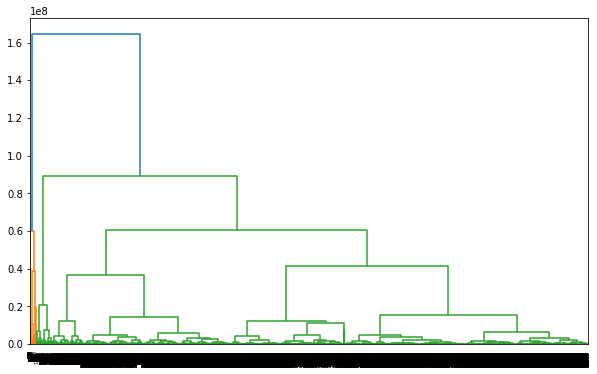

In [58]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize = (10,6))
den = shc.dendrogram(shc.linkage(agg_data, method = "ward"))

In [72]:
model=AgglomerativeClustering(n_clusters=3)
model.fit(agg_data)

AgglomerativeClustering(n_clusters=3)

In [73]:
model.labels_

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [74]:
agg_data["Groups"]= model.labels_

In [75]:
agg_data.head()

,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Loaned From,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Groups
0,31,6,94,94,211,11050000.0,565000.0,2202,0,5.0,4.0,4.0,2,4,1,21,10.0,26,173.736,159.0,90,90,90,94,95,95,95,94,95,95,95,93,86,86,86,93,66,63,63,63,66,61,49,49,49,61,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,22650000.0,1
1,33,123,94,94,325,7700000.0,405000.0,2228,1,5.0,4.0,5.0,0,1,1,26,7.0,26,188.976,183.0,94,94,94,92,93,93,93,92,91,91,91,91,84,84,84,91,68,64,64,64,68,64,56,56,56,64,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,12710000.0,1
2,26,20,92,93,434,11850000.0,290000.0,2143,1,5.0,5.0,5.0,0,5,1,14,10.0,26,179.832,150.0,87,87,87,92,92,92,92,92,92,92,92,91,84,84,84,91,68,63,63,63,68,63,50,50,50,63,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,22810000.0,1
3,27,139,91,93,374,7200000.0,260000.0,1471,1,4.0,3.0,1.0,2,3,1,5,1.0,26,195.072,168.0,63,63,63,65,63,63,63,65,63,63,63,63,60,60,60,63,63,64,64,64,63,63,65,65,65,63,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,13860000.0,1
4,27,13,91,92,373,10200000.0,355000.0,2281,1,4.0,5.0,4.0,0,6,1,19,7.0,26,1557.528,154.0,85,85,85,90,90,90,90,90,91,91,91,91,90,90,90,91,80,80,80,80,80,76,69,69,69,76,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,19640000.0,1


### DBSCAN

In [76]:
db_data = df

In [77]:
from sklearn.neighbors import NearestNeighbors

In [78]:
n=NearestNeighbors(n_neighbors=2)
n_fit=n.fit(db_data)
distance,index=n_fit.kneighbors(db_data)

In [79]:
distance=np.sort(distance,axis=0)
distance=distance[:,1]

Text(0.5, 0, 'distance')

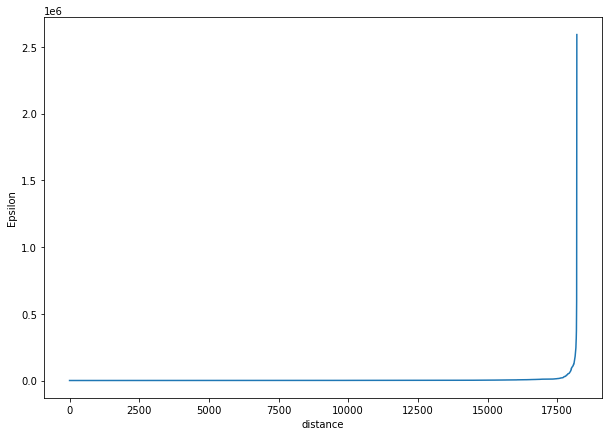

In [80]:
plt.figure(figsize =(10,7))
plt.plot(distance)
plt.ylabel("Epsilon")
plt.xlabel("distance")

In [81]:
from sklearn.cluster import DBSCAN
model=DBSCAN(eps=0.1,min_samples=5)
model.fit(db_data)
model.labels_

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [82]:
db_data["Groups"]=model.labels_

In [83]:
db_data

,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Loaned From,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Groups
0,31,6,94,94,211,11050000.0,565000.0,2202,0,5.0,4.0,4.0,2,4,1,21,10.0,26,173.736,159.0,90,90,90,94,95,95,95,94,95,95,95,93,86,86,86,93,66,63,63,63,66,61,49,49,49,61,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,22650000.0,-1
1,33,123,94,94,325,7700000.0,405000.0,2228,1,5.0,4.0,5.0,0,1,1,26,7.0,26,188.976,183.0,94,94,94,92,93,93,93,92,91,91,91,91,84,84,84,91,68,64,64,64,68,64,56,56,56,64,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,12710000.0,-1
2,26,20,92,93,434,11850000.0,290000.0,2143,1,5.0,5.0,5.0,0,5,1,14,10.0,26,179.832,150.0,87,87,87,92,92,92,92,92,92,92,92,91,84,84,84,91,68,63,63,63,68,63,50,50,50,63,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,22810000.0,-1
3,27,139,91,93,374,7200000.0,260000.0,1471,1,4.0,3.0,1.0,2,3,1,5,1.0,26,195.072,168.0,63,63,63,65,63,63,63,65,63,63,63,63,60,60,60,63,63,64,64,64,63,63,65,65,65,63,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,13860000.0,-1
4,27,13,91,92,373,10200000.0,355000.0,2281,1,4.0,5.0,4.0,0,6,1,19,7.0,26,1557.528,154.0,85,85,85,90,90,90,90,90,91,91,91,91,90,90,90,91,80,80,80,80,80,76,69,69,69,76,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,19640000.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,19,46,47,65,164,60000.0,1000.0,1307,1,1.0,2.0,2.0,2,3,0,4,22.0,26,179.832,134.0,44,44,44,46,46,46,46,46,47,47,47,46,47,47,47,46,46,47,47,47,46,47,47,47,47,47,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,143000.0,-1
18203,19,144,47,63,587,60000.0,1000.0,1098,1,1.0,2.0,2.0,2,6,0,26,21.0,26,192.024,170.0,47,47,47,41,44,44,44,41,42,42,42,40,37,37,37,40,32,33,33,33,32,31,34,34,34,31,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,113000.0,-1
18204,16,46,47,67,121,60000.0,1000.0,1189,1,1.0,3.0,2.0,2,6,0,26,33.0,26,176.784,148.0,47,47,47,47,48,48,48,47,46,46,46,46,40,40,40,46,36,32,32,32,36,35,30,30,30,35,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,70.0,69.0,50.0,47.0,58.0,45.0,60.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,165000.0,-1
18205,17,46,47,66,586,60000.0,1000.0,1228,1,1.0,3.0,2.0,2,3,0,24,34.0,26,1554.480,154.0,49,49,49,49,48,48,48,49,47,47,47,48,41,41,41,48,38,34,34,34,38,37,33,33,33,37,44.0,50.0,39.0,42.0,40.0,51.0,34.0,32.0,32.0,52.0,61.0,60.0